<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-projet 1 - Méthode Monte Carlo</h1>
<h2 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;">[Harbec/William, Leduc/Marc-Antoine, St-Onge/Émily]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[2215754, 2198586, 2134102]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[22 janvier 2025]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[Jérémie Villeneuve, Sean Molesky, Maksim Skorobogatiy]</h2>
</div>


### Calcul du volume d'une $N$-sphère (20 points)

### Introduction
Une $N$-sphère de rayon $R$ est définie comme l'ensemble des points situés à une distance inférieure ou égale à $R$ de l'origine dans un espace à $N$ dimensions. Si on utilise les coordonnées cartésiennes $(x_1, x_2, \dots, x_N)$ pour décrire un point, alors ce point est situé à l'intérieur de la $N$-sphère si le critère suivant est respecté :

$$
\sum_{i=1}^{N} x_i^2 \leq R^2, \quad N=1,2,\dots
$$

Voici quelques exemples de $N$-sphères afin de clarifier ce concept :
* Une 3-sphère est la sphère habituelle en trois dimensions. Son volume est la boule dont la sphère est le contour.
* Une 2-sphère est un cercle. Son volume est l'aire du disque circonscrit par le cercle.
* Une 1-sphère est formée de deux points sur une droite qui sont situés à égale distance de l'origine. Son volume est défini comme la longueur du segment.

Ce concept peut sembler abstrait, mais il apparaît naturellement en physique statistique quand on travaille dans l'espace de phase pour étudier les propriétés d'un ensemble de $N$ particules avec une énergie fixe (ex. : gaz idéal dans une boîte fermée). 

Dans ce mini-devoir, on vous demande de calculer le volume d'une $N$-sphère de rayon unitaire $R=1$ à l'aide de la méthode de Monte-Carlo vue en classe pour le calcul d'intégrales. Le résultat est déjà connu, à savoir :

$$
V_N = \frac{\pi^{N/2}}{\Gamma\left(\frac{N}{2} + 1\right)},
$$
où $\Gamma(x)$ est la fonction gamma, ce qui vous permettra de calculer l'erreur afin d'analyser le comportement de l'algorithme.

### Choix de la méthode de Monte-Carlo

**a) [4 pts]** Expliquer pourquoi les méthodes de Monte Carlo pour l'intégration sont avantageuses pour le calcul d'intégrales à $N$ dimensions lorsque $N$ devient grand.

### Réponse a):
Lorsque nous voulons faire un calcul d'intégrales à N dimensions, où N est grand, il est préférable d'utiliser des méthodes aléatoires plutôt que des méthodes déterministes. En voulant utiliser une méthode déterministe, on doit évaluer l'intégrale dans une grille régulière. Dans le cas où N est grand, le nombre de points augmente exponentionnellement avec N. La méthode Monte Carlo ne dépend pas de la dimension, mais plutôt de la fonction. Elle est avantageuse pour le calcul d’intégrales à N dimensions lorsque N devient grand, puisque comparativement aux formules de quadratures, elle requière peu d’évaluations de la fonction. De plus, l'erreur de la méthode de Monte Carlo est proportionnelle à $O(1/\sqrt{N_{tot}})$ peu importe la dimension et plus le nombre de points total est grand, plus la méthode est précise. Pour des méthodes déterministes, le nombre de points nécessaires, par exemple pour une quadrature, augmente exponentiellement avec N. Cela rend ces méthodes bien plus inefficaces pour des dimensions élevées.

### Calcul du volume

**b) [6 pts]** Calculer le volume d'une $N$-sphère de rayon unitaire pour $N = \left\{3,6\right\}$. Pour chacune de ces $N$-sphères, calculer le résultat en faisant varier le nombre de points générés à chaque essai en utilisant les valeurs $N_{tot} = \left\{100,200,400,800,1600\right\}$. Générer 100 essais par simulation et utiliser la valeur moyenne du volume comme résultat. On vous demande donc de calculer dix valeurs de volume (cinq par $N$-sphère).

Présenter vos résultats sous forme de tableau, en fournissant une incertitude relative sur chaque résultat. Expliquer comment cette incertitude a été calculée.

### Réponse b):
*(Ajoutez votre réponse ici)*

In [4]:
import numpy as np
from scipy.special import gamma

R = 1.0  # Rayon de la N-sphère (m)

D_val = [3, 6]  # Dimensions des N-sphères
Ntot_val = [100, 200, 400, 800, 1600]  # Nombre de points par essai
Ness = 100  # Nombre d'essais par simulation

V_moyens = np.zeros((len(D_val), len(Ntot_val)))  # Volume moyen pour chaque dimension et Ntot
V_inc = np.zeros((len(D_val), len(Ntot_val)))  # Incertitudes pour chaque dimension et Ntot
E_monte_carlo = np.zeros((len(D_val), len(Ntot_val)))  # Erreurs Monte-Carlo pour chaque dimension et Ntot

def volume_theorique(N, R):
    return (np.pi**(N/2) * R**N) / gamma(N/2 + 1)

for d_idx, D in enumerate(D_val):
    V_theorique = volume_theorique(D, R)
    print(f"Volume théorique pour D={D}: {V_theorique:.5f}")

    for n_idx, Ntot in enumerate(Ntot_val):
        volumes = np.zeros(Ness)  
        erreurs = np.zeros(Ness)  
        
        for k in range(Ness): 
            # Génération de points aléatoires dans le cube [-1, 1]^D
            points = np.random.uniform(low=-1, high=1, size=(Ntot, D))
            
            # Calcul du nombre de points à l'intérieur de la N-sphère
            distances = np.sum(points**2, axis=1)
            Nint = np.sum(distances <= R**2)
            
            # Calcul du volume estimé pour cet essai
            volumes[k] = (Nint / Ntot) * (2 * R)**D
            # Calcul de l'erreur pour cet essai
            erreurs[k] = abs((Nint / Ntot) * (2 * R)**D - V_theorique)  # Cube de côté 2*1
        
        # Calcul de la moyenne et de l'incertitude
        V_moyens[d_idx, n_idx] = np.mean(volumes)
        V_inc[d_idx, n_idx] = np.std(volumes) / np.sqrt(Ness) 
        E_monte_carlo[d_idx, n_idx] = np.mean(erreurs)


print("\nRésultats :")
for d_idx, D in enumerate(D_val):
    print(f"\nDimension D={D}")
    print(f"{'Ntot':>10} {'Volume (moyen)':>20} {'Incertitude':>15}")
    for n_idx, Ntot in enumerate(Ntot_val):
        print(f"{Ntot:>10} {V_moyens[d_idx, n_idx]:>20.5f} {V_inc[d_idx, n_idx]:>15.5f}")

print("L'incertitude est calculée comme l'erreur-type de la moyenne sur les 100 essais: STD/sqrt(N_ess)")


Volume théorique pour D=3: 4.18879
Volume théorique pour D=6: 5.16771

Résultats :

Dimension D=3
      Ntot       Volume (moyen)     Incertitude
       100              4.18160         0.04175
       200              4.22680         0.02661
       400              4.17700         0.01885
       800              4.18560         0.01504
      1600              4.19095         0.01021

Dimension D=6
      Ntot       Volume (moyen)     Incertitude
       100              4.96640         0.19351
       200              5.22560         0.12261
       400              5.08800         0.08810
       800              5.23360         0.05950
      1600              5.25960         0.04278
L'incertitude est calculée comme l'erreur-type de la moyenne sur les 100 essais: STD/sqrt(N_ess)


### Réponse c):
*(Ajoutez votre réponse ici)*

### Analyse de l'erreur

**c) [4 pts]** À l'aide des résultats précédents obtenus, tracer un graphique de l'erreur relative $E$ sur le volume calculé en fonction de $N_{tot}$ pour chaque $N$-sphère. (Vous tracerez donc deux séries de données sur le même graphique.) Utiliser une échelle qui permet de représenter facilement le comportement de l'erreur.

[0.32367902 0.21601776 0.14855161 0.12024839 0.07992259]
[1.58680532 1.00732553 0.70877128 0.49633723 0.33258298]


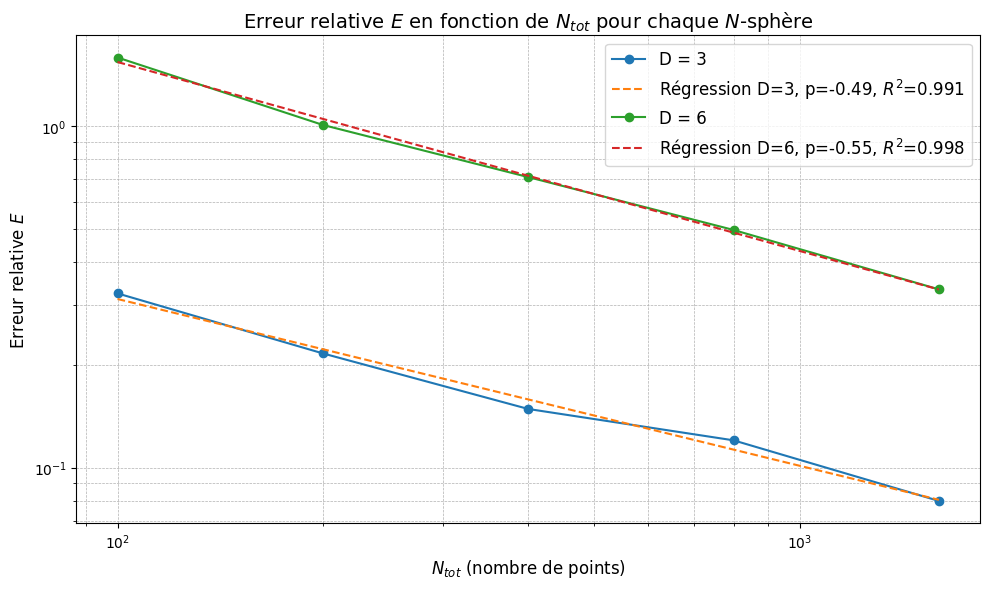

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



plt.figure(figsize=(10, 6))

for d_idx, D in enumerate(D_val):
    plt.plot(Ntot_val, E_monte_carlo[d_idx], marker='o', label=f'D = {D}')
    print(E_monte_carlo[d_idx])
    log_Ntot = np.log10(Ntot_val)
    log_E = np.log10(E_monte_carlo[d_idx])
    slope, intercept, r_value, _, _ = linregress(log_Ntot, log_E)
    r_squared = r_value ** 2
    regression_line = 10 ** (slope * log_Ntot + intercept)
    plt.plot(Ntot_val, regression_line, linestyle='--', label=f'Régression D={D}, p={slope:.2f}, $R^2$={r_squared:.3f}')

plt.xscale('log')  
plt.yscale('log') 
plt.xlabel('$N_{tot}$ (nombre de points)', fontsize=12)
plt.ylabel('Erreur relative $E$', fontsize=12)
plt.title('Erreur relative $E$ en fonction de $N_{tot}$ pour chaque $N$-sphère', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### Réponse c):
*(Ajoutez votre réponse ici)*

**d) [2 pts]** Déterminer le comportement de l'erreur relative en calculant l'exposant $p$ tel que :

$$
E = O(N_{tot}^p)
$$
pour chacune des deux $N$-sphères.

In [9]:
for d_idx, D in enumerate(D_val):
    log_Ntot = np.log10(Ntot_val)
    log_E = np.log10(E_monte_carlo[d_idx])
    slope, intercept, r_value, _, _ = linregress(log_Ntot, log_E)
    r_squared = r_value ** 2
    regression_line = 10 ** (slope * log_Ntot + intercept)
    print(f'La valeur de p, soit la pente de la régression, pour la dimension {D} est de {slope:.2f}.')

La valeur de p, soit la pente de la régression, pour la dimension 3 est de -0.49.
La valeur de p, soit la pente de la régression, pour la dimension 6 est de -0.55.


### Réponse d):
*(Ajoutez votre réponse ici)*

**e) [4 pts]** Discuter des points suivants :
* Comment les valeurs de $p$ calculées se comparent-t-elle aux valeurs théoriques attendues ?
* La précision des résultats obtenus est-elle la même pour la 3-sphère et pour la 6-sphère ?
* Comment l'incertitude relative calculée en (b) se compare-t-elle à l'erreur relative ?

### Réponse e):
- Puisque l'erreur converge selon $\frac{1}{\sqrt{N_{tot}}}$ pour une méthode de Monte Carlo, on s'attend à ce que ça converge à l'ordre $-\frac{1}{2}$. C'est effectivement approximativement ce que nous avons.
- À l'aide du graphique placé à la sous-question c, on voit que l'erreur relative pour la 3-sphère est entre 8% et 32% et celle de la 6-sphère est entre 33% et 131%. La précision est donc meilleure pour la 3-sphère. 
- Elles sont assez similaires pour les deux sphères. Les tendances sont décroissantes pour l'incertitude relative et pour l'erreur relative.